<a href="https://colab.research.google.com/github/IlhamIndraAtmaja/Matkul-Pengolahan-Citra/blob/main/jobsheet%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transormasi Kurva (Citra Negatif)

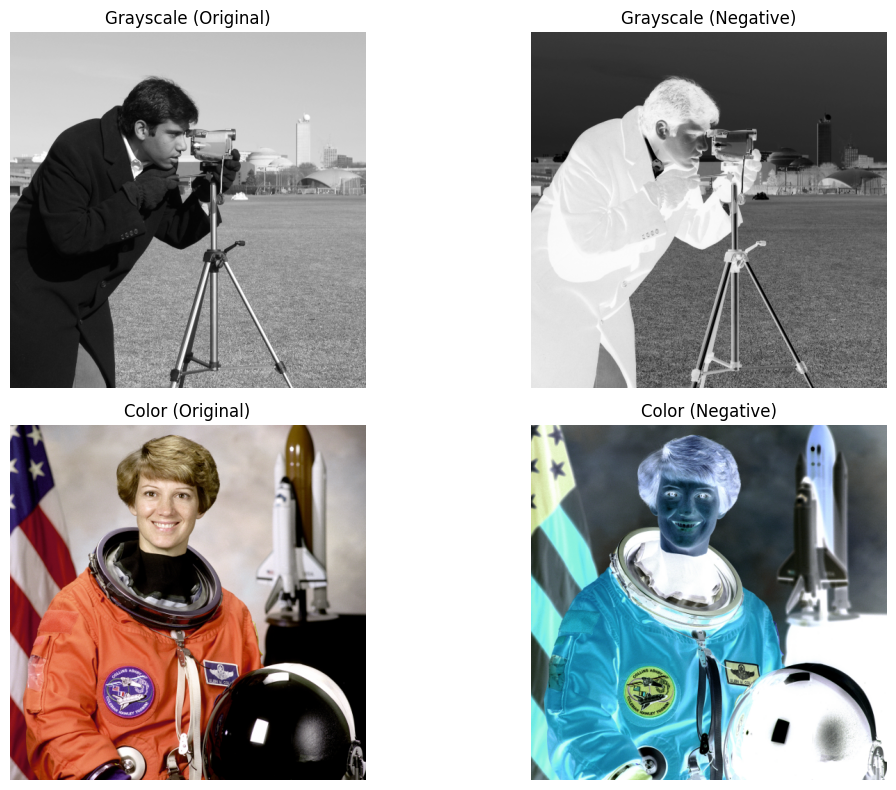

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# TRANSFORMASI NEGATIF CITRA GRAYSCALE
image_gray_uint8 = data.camera()
image_gray_float = img_as_float(image_gray_uint8)

negative_gray = 1.0 - image_gray_float

# TRANSFORMASI NEGATIF CITRA BERWARNA
image_color_uint8 = data.astronaut()
image_color_float = img_as_float(image_color_uint8)

negative_color = 1.0 - image_color_float

# PLOTTING HASIL
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Baris 1: Grayscale (original, negative)
axes[0, 0].imshow(image_gray_float, cmap='gray')
axes[0, 0].set_title("Grayscale (Original)")
axes[0, 0].axis('off')

axes[0, 1].imshow(negative_gray, cmap='gray')
axes[0, 1].set_title("Grayscale (Negative)")
axes[0, 1].axis('off')

# Baris 2: RGB (original, negative)
axes[1, 0].imshow(image_color_float)
axes[1, 0].set_title("Color (Original)")
axes[1, 0].axis('off')

axes[1, 1].imshow(negative_color)
axes[1, 1].set_title("Color (Negative)")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

Histogram dan Ekualisasi Histogram



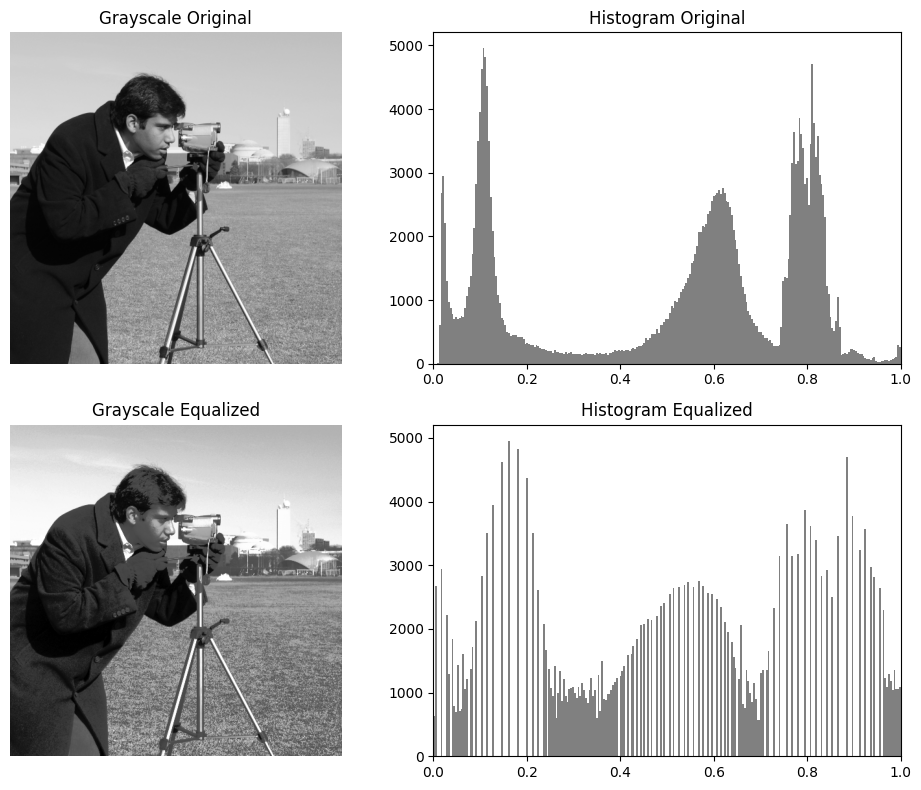

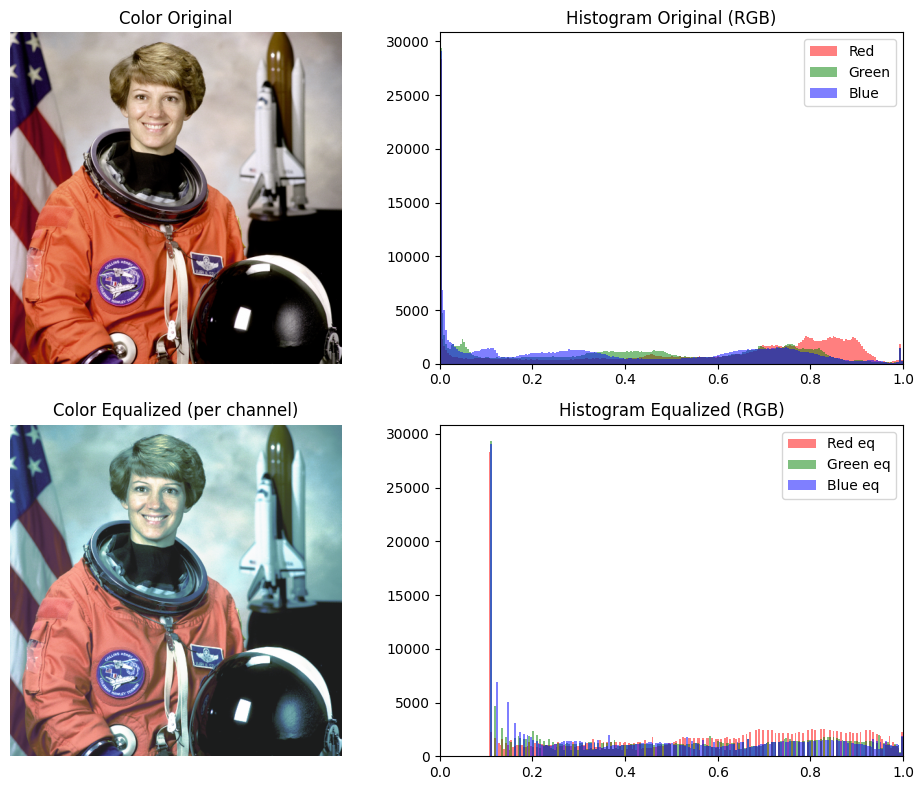

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure, img_as_float

# BAGIAN 1: Histogram & Ekualisasi Histogram (Grayscale)

# Memuat citra grayscale
image_gray_uint8 = data.camera()
image_gray = img_as_float(image_gray_uint8)

# 2. Menghitung histogram citra asli (dengan numpy.histogram)
# Kita perbesar bins=256 untuk melihat distribusi piksel
hist_gray, bins_gray = np.histogram(image_gray.ravel(), bins=256, range=(0, 1))

# 3. Ekualisasi histogram
# Dengan skimage.exposure.equalize_hist, hasil di rentang [0..1]
image_gray_eq = exposure.equalize_hist(image_gray)
hist_gray_eq, bins_gray_eq = np.histogram(image_gray_eq.ravel(), bins=256, range=(0, 1))

# 4. Plot grayscale: citra asli & histogram, citra ekualisasi & histogram
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli Grayscale
axes[0, 0].imshow(image_gray, cmap='gray')
axes[0, 0].set_title("Grayscale Original")
axes[0, 0].axis('off')

# (b) Histogram Citra Asli
axes[0, 1].hist(image_gray.ravel(), bins=256, range=(0, 1), color='gray')
axes[0, 1].set_title("Histogram Original")
axes[0, 1].set_xlim(0, 1)

# (c) Citra Hasil Ekualisasi
axes[1, 0].imshow(image_gray_eq, cmap='gray')
axes[1, 0].set_title("Grayscale Equalized")
axes[1, 0].axis('off')

# (d) Histogram Citra Hasil Ekualisasi
axes[1, 1].hist(image_gray_eq.ravel(), bins=256, range=(0, 1), color='gray')
axes[1, 1].set_title("Histogram Equalized")
axes[1, 1].set_xlim(0, 1)

plt.tight_layout()
plt.show()

# BAGIAN 2: Histogram & Ekualisasi Histogram (Citra Warna

# 1. Memuat citra berwarna
image_color_uint8 = data.astronaut()
image_color = img_as_float(image_color_uint8)

# 2. Menghitung histogram gabungan (semua kanal) atau per kanal
# Di sini kita tampilkan histogram gabungan R, G, B untuk citra asli
r_channel = image_color[:, :, 0]
g_channel = image_color[:, :, 1]
b_channel = image_color[:, :, 2]

# Hitung histogram untuk tiap kanal, 256 bins
hist_r, bins_r = np.histogram(r_channel.ravel(), bins=256, range=(0, 1))
hist_g, bins_g = np.histogram(g_channel.ravel(), bins=256, range=(0, 1))
hist_b, bins_b = np.histogram(b_channel.ravel(), bins=256, range=(0, 1))

# 3. Ekualisasi histogram tiap kanal secara independen
# (Catatan: cara ini bisa mengubah keseimbangan warna.
# Terkadang lebih baik melakukan ekualisasi hanya pada kanal luminance (Y)
# atau Value (HSV). Tapi di sini kita tunjukkan contoh per kanal.)
r_eq = exposure.equalize_hist(r_channel)
g_eq = exposure.equalize_hist(g_channel)
b_eq = exposure.equalize_hist(b_channel)

# Gabungkan kembali menjadi citra RGB yang sudah di-ekualisasi
image_color_eq = np.dstack((r_eq, g_eq, b_eq))

# Hitung histogram citra berwarna ekualisasi (tiap kanal)
hist_r_eq, bins_r_eq = np.histogram(r_eq.ravel(), bins=256, range=(0, 1))
hist_g_eq, bins_g_eq = np.histogram(g_eq.ravel(), bins=256, range=(0, 1))
hist_b_eq, bins_b_eq = np.histogram(b_eq.ravel(), bins=256, range=(0, 1))

# 4. Plot citra berwarna & histogram
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 8))

# (a) Citra Asli (Color)
axes2[0, 0].imshow(image_color)
axes2[0, 0].set_title("Color Original")
axes2[0, 0].axis('off')

# (b) Histogram Asli (tumpuk R, G, B)
axes2[0, 1].hist(r_channel.ravel(), bins=256, range=(0, 1), color='red', alpha=0.5, label='Red')
axes2[0, 1].hist(g_channel.ravel(), bins=256, range=(0, 1), color='green', alpha=0.5, label='Green')
axes2[0, 1].hist(b_channel.ravel(), bins=256, range=(0, 1), color='blue', alpha=0.5, label='Blue')
axes2[0, 1].set_title("Histogram Original (RGB)")
axes2[0, 1].set_xlim(0, 1)
axes2[0, 1].legend(loc='upper right')

# (c) Citra Hasil Ekualisasi (RGB)
axes2[1, 0].imshow(image_color_eq)
axes2[1, 0].set_title("Color Equalized (per channel)")
axes2[1, 0].axis('off')

# (d) Histogram Ekualisasi (tumpuk R, G, B)
axes2[1, 1].hist(r_eq.ravel(), bins=256, range=(0, 1), color='red', alpha=0.5, label='Red eq')
axes2[1, 1].hist(g_eq.ravel(), bins=256, range=(0, 1), color='green', alpha=0.5, label='Green eq')
axes2[1, 1].hist(b_eq.ravel(), bins=256, range=(0, 1), color='blue', alpha=0.5, label='Blue eq')
axes2[1, 1].set_title("Histogram Equalized (RGB)")
axes2[1, 1].set_xlim(0, 1)
axes2[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()


Konvolusi (Filter Rata-rata)

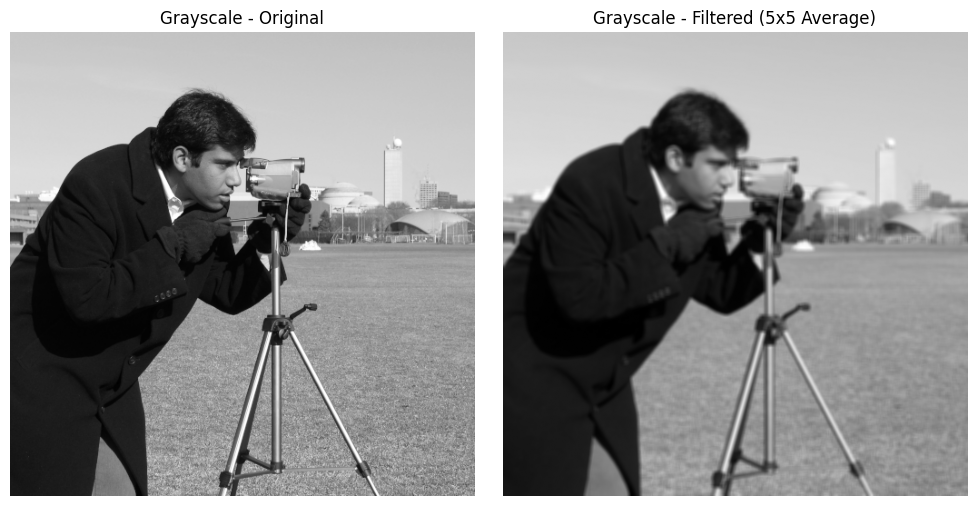

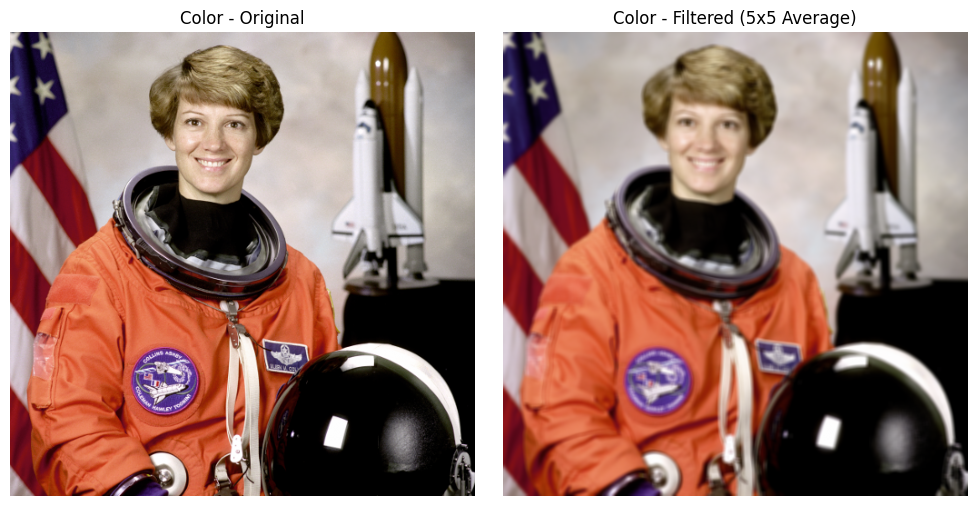

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy import ndimage as ndi

# Filter Rata-rata pada Citra Grayscale
# A. Memuat citra grayscale (camera)
gray_uint8 = data.camera()
gray_img = img_as_float(gray_uint8)

# B. Definisikan kernel filter rata-rata (contoh: 5x5)
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size * kernel_size)

# C. Lakukan konvolusi pada citra grayscale
gray_filtered = ndi.convolve(gray_img, kernel, mode='reflect')

# D. Tampilkan hasil
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(gray_img, cmap='gray')
axes[0].set_title("Grayscale - Original")
axes[0].axis('off')

axes[1].imshow(gray_filtered, cmap='gray')
axes[1].set_title(f"Grayscale - Filtered ({kernel_size}x{kernel_size} Average)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Filter Rata-rata pada Citra Berwarna
# A. Memuat citra berwarna (astronaut)
color_uint8 = data.astronaut()
color_img = img_as_float(color_uint8)

# B. Kita akan terapkan filter rata-rata pada tiap kanal R, G, B
# secara terpisah, lalu gabungkan.
color_filtered = np.zeros_like(color_img)

for c in range(3):
    channel_original = color_img[:, :, c]
    channel_filtered = ndi.convolve(channel_original, kernel, mode='reflect')
    color_filtered[:, :, c] = channel_filtered

# C. Tampilkan hasil
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))

axes2[0].imshow(color_img)
axes2[0].set_title("Color - Original")
axes2[0].axis('off')

axes2[1].imshow(color_filtered)
axes2[1].set_title(f"Color - Filtered ({kernel_size}x{kernel_size} Average)")
axes2[1].axis('off')

plt.tight_layout()
plt.show()


 Filter Median (penghilangan noise/derau)

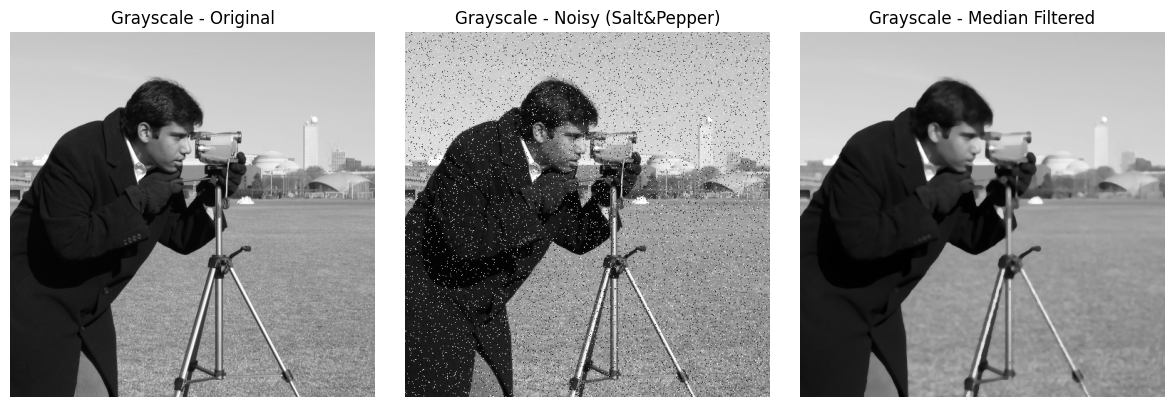

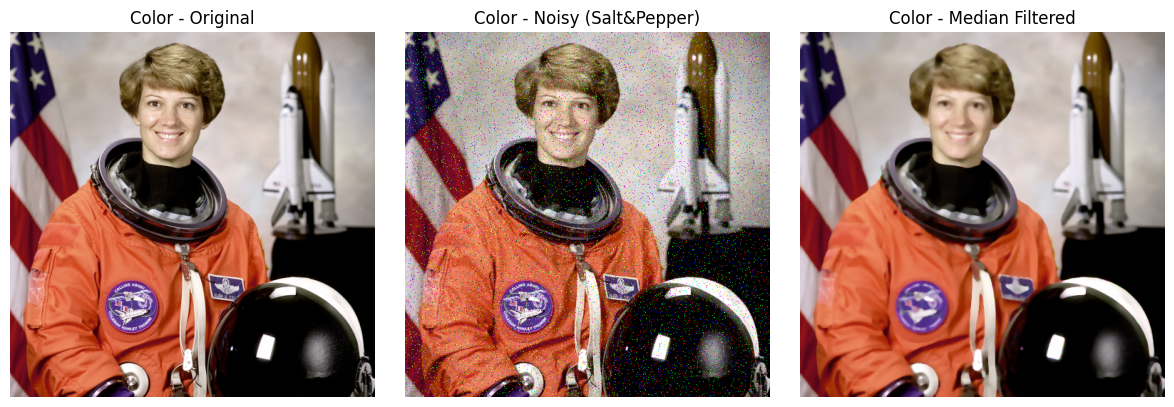

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, util, filters, morphology, img_as_float

# Filter Median pada Citra Grayscale
# A. Memuat citra grayscale (contoh: 'camera')
gray_uint8 = data.camera()
gray_float = img_as_float(gray_uint8)

# B. Menambahkan noise jenis salt-and-pepper
gray_noisy = util.random_noise(gray_float, mode='s&p', amount=0.05)

# C. Menerapkan filter median
# Kita gunakan structuring element berbentuk disk radius 3
disk3 = morphology.disk(3)
gray_denoised = filters.median(gray_noisy, disk3)

# D. Plot hasil
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(gray_float, cmap='gray')
axes[0].set_title("Grayscale - Original")
axes[0].axis('off')

axes[1].imshow(gray_noisy, cmap='gray')
axes[1].set_title("Grayscale - Noisy (Salt&Pepper)")
axes[1].axis('off')

axes[2].imshow(gray_denoised, cmap='gray')
axes[2].set_title("Grayscale - Median Filtered")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Filter Median pada Citra Berwarna
# A. Memuat citra berwarna (contoh: 'astronaut')
color_uint8 = data.astronaut()
color_float = img_as_float(color_uint8)

# B. Menambahkan noise salt-and-pepper
color_noisy = util.random_noise(color_float, mode='s&p', amount=0.05)

# C. Menerapkan filter median
# Pada scikit-image 0.19+, median() mampu menangani array 3D (RGB)
# atau kita bisa memanggil per kanal. Di sini langsung:
color_denoised = np.zeros_like(color_noisy)

for c in range(color_noisy.shape[2]):
    color_denoised[:, :, c] = filters.median(color_noisy[:, :, c], morphology.disk(3))

# D. Plot hasil
fig2, axes2 = plt.subplots(1, 3, figsize=(12, 4))

axes2[0].imshow(color_float)
axes2[0].set_title("Color - Original")
axes2[0].axis('off')

axes2[1].imshow(color_noisy)
axes2[1].set_title("Color - Noisy (Salt&Pepper)")
axes2[1].axis('off')

axes2[2].imshow(color_denoised)
axes2[2].set_title("Color - Median Filtered")
axes2[2].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# TRANSFORMASI NEGATIF CITRA GRAYSCALE
image_gray_uint8 = data.camera()
image_gray_float = img_as_float(image_gray_uint8)

negative_gray = 1.0 - image_gray_float

# TRANSFORMASI NEGATIF CITRA BERWARNA
image_color_uint8 = data.astronaut()
image_color_float = img_as_float(image_color_uint8)

negative_color = 1.0 - image_color_float

# PLOTTING HASIL
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Baris 1: Grayscale (original, negative)
axes[0, 0].imshow(image_gray_float, cmap='gray')
axes[0, 0].set_title("Grayscale (Original)")
axes[0, 0].axis('off')

axes[0, 1].imshow(negative_gray, cmap='gray')
axes[0, 1].set_title("Grayscale (Negative)")
axes[0, 1].axis('off')

# Baris 2: RGB (original, negative)
axes[1, 0].imshow(image_color_float)
axes[1, 0].set_title("Color (Original)")
axes[1, 0].axis('off')

axes[1, 1].imshow(negative_color)
axes[1, 1].set_title("Color (Negative)")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()